In [1]:
from data_processor import *
from global_variables import *
import matplotlib.pyplot as plt
if not os.path.exists('pics/'):
    os.makedirs('pics/')

# A Single City's Information - Weather

## Weather Situation of a Whole Year

### Pie

In [12]:
# Parameter
city = 'KSAN'
year = 2018
fname = 'pics/{}_icon_y{}_pie.jpg'.format(city,year)
# Code
year_start, year_end = get_yearly_start_end(year=year)
weather_info = get_info(city, year_start, year_end, info_type='weather')
keys = weather_info.index.tolist()
values = weather_info.days.tolist()


The weather information of San Diego during 20180101-20181231 :
Total days: 365
              days  percentage
icon                          
partlysunny    102    0.279452
partlycloudy    96    0.263014
mostlysunny     53    0.145205
rain            39    0.106849
mostlycloudy    29    0.079452
hazy            18    0.049315
clear           15    0.041096
cloudy          11    0.030137
tstorms          2    0.005479
102


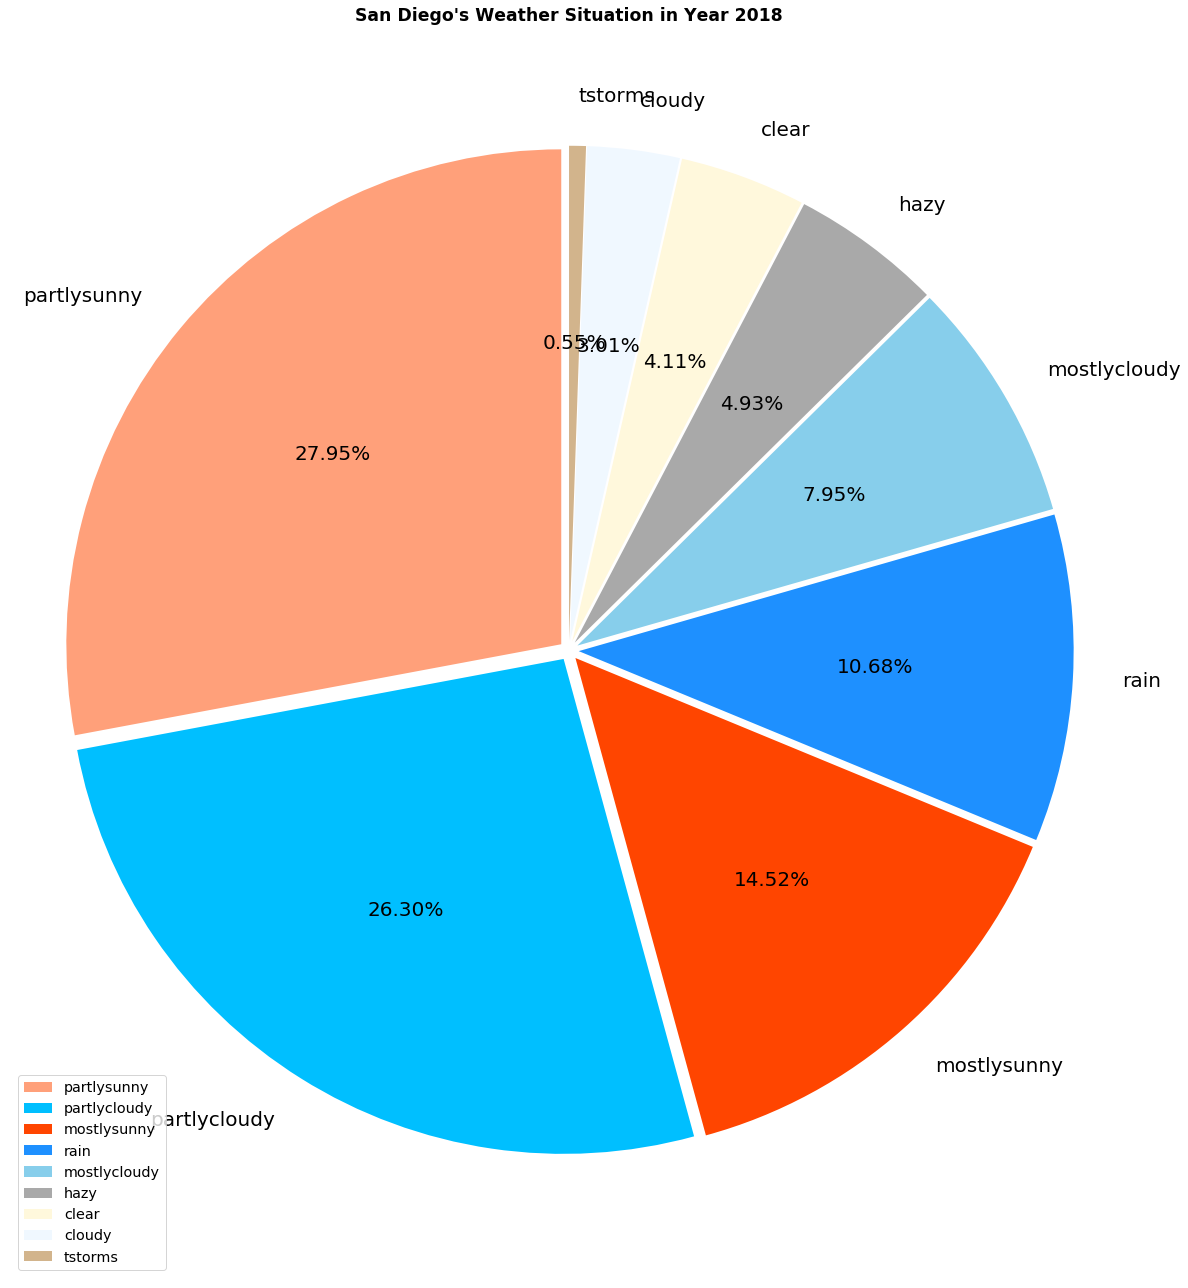

In [9]:
# Plot
plt.figure(figsize=(20,23))
color_list = list(weather_color_refer[k] for k in keys)
patches,label_text,percent_text = plt.pie(values,
                                          explode= tuple([0.02]*len(keys)),
                                          labels=keys,
                                          colors=color_list,
                                          autopct = '%3.2f%%', #digits
                                          shadow = False, #No Shadow
                                          startangle =90, #reverse start angle
                                          pctdistance = 0.6) #数值距圆心半径倍数距离
plt.axis('equal')
plt.legend(loc='lower left',fontsize='x-large')
for t in label_text:
    t.set_size(20)
for t in percent_text:
    t.set_size(20)
#plt.savefig(fname)
title_str = '{}\'s Weather Situation in Year {}'.format(code_city_refer[city], year)
plt.title(title_str,fontsize='xx-large',fontweight='bold')
plt.show()

### Plot

In [43]:
# Parameter
city = 'KSAN'
year = 2018
fname = 'pics/{}_icon_y{}_plot.jpg'.format(city,year)
# Code
icon_days_dict = dict([(key,[]) for key in weather_color_refer.keys()])
for month in range(1,13):
    month_start, month_end = get_monthly_start_end(year=year, month=month)
    weather_info = get_info(city,month_start, month_end, info_type='weather', output=False)
    for key in weather_color_refer.keys():
            try:
                icon_days_dict[key].append(weather_info['days'][key])
            except :
                icon_days_dict[key].append(0)
print(icon_days_dict)

{'mostlysunny': [6, 5, 2, 6, 2, 3, 3, 5, 4, 3, 7, 7], 'partlysunny': [6, 2, 9, 9, 11, 9, 13, 9, 10, 13, 8, 3], 'cloudy': [0, 0, 0, 2, 4, 3, 0, 0, 2, 0, 0, 0], 'mostlycloudy': [2, 1, 2, 4, 4, 6, 4, 1, 3, 1, 0, 1], 'partlycloudy': [6, 9, 6, 6, 3, 8, 11, 15, 10, 4, 9, 9], 'rain': [4, 5, 10, 2, 7, 0, 0, 1, 1, 1, 3, 5], 'clear': [2, 2, 1, 1, 0, 1, 0, 0, 0, 5, 2, 1], 'hazy': [5, 4, 1, 0, 0, 0, 0, 0, 0, 3, 1, 4], 'tstorms': [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1]}


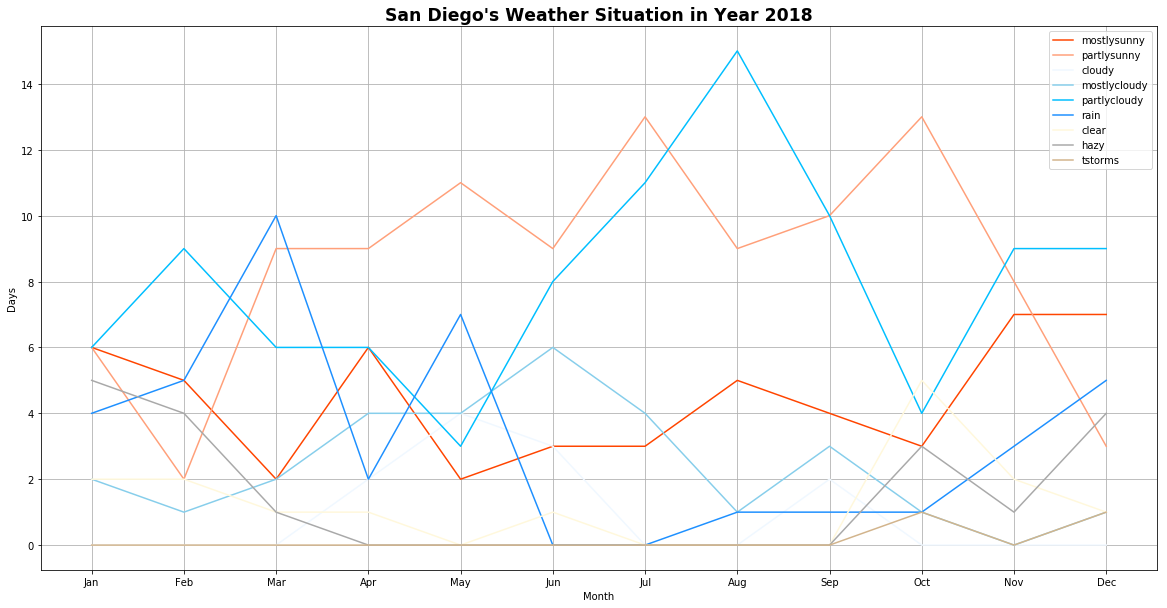

In [44]:
# Plot
plt.figure(figsize=(20,10))
for key in weather_color_refer.keys():
    plt.plot(range(12), icon_days_dict[key], color=weather_color_refer[key])
title_str = '{}\'s Weather Situation in Year {}'.format(code_city_refer[city], year)
plt.xlabel('Month')
plt.xticks(range(12),['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.ylabel('Days')
plt.legend(list([key for key in weather_color_refer.keys()]))
plt.title(title_str,fontsize='xx-large',fontweight='bold')
plt.grid()
plt.show()

## Weather Situation of a Month

In [5]:
# Parameter
year = 2019
month = 3
fname = 'pics/{}_y{}_m{}.jpg'.format(city,year,month)
# Code
month_start, month_end = get_monthly_start_end(year=year, month=month)
weather_info = get_info(city,month_start, month_end, info_type='weather')
keys = weather_info.index.tolist()
values = weather_info.days.tolist()

The weather information of San Francisco during 20190301-20190331 :
Total days: 31
              days  percentage
icon                          
rain            16    0.516129
mostlysunny      9    0.290323
partlycloudy     2    0.064516
clear            1    0.032258
mostlycloudy     1    0.032258
partlysunny      1    0.032258
tstorms          1    0.032258


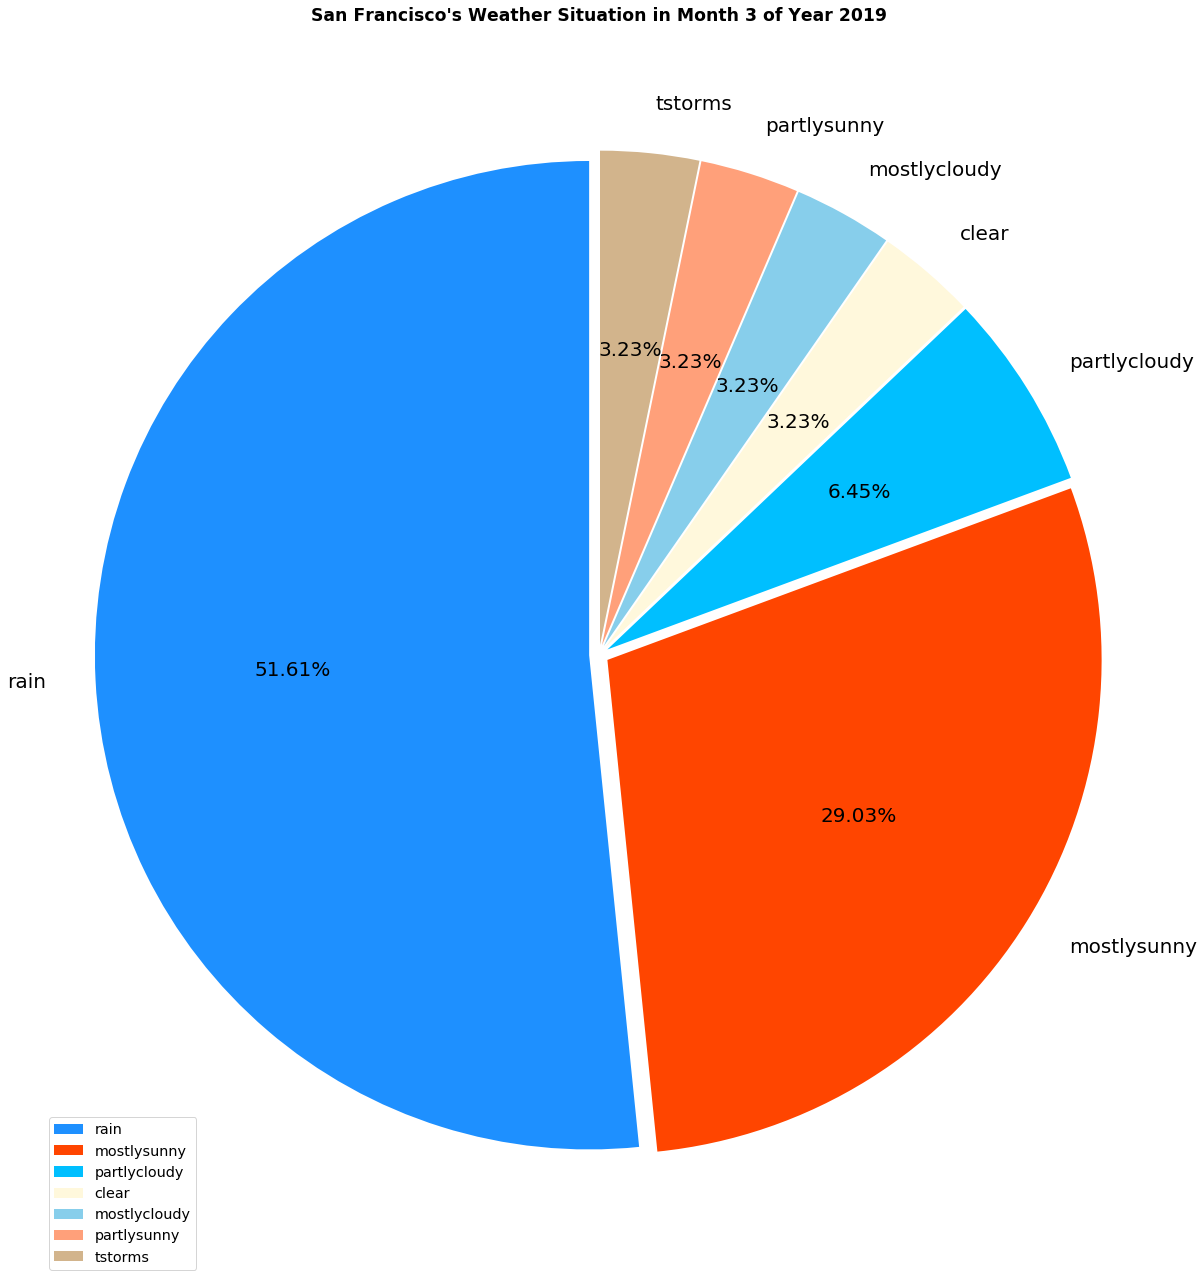

In [7]:
# Plot
plt.figure(figsize=(20,23))
color_list = list(weather_color_refer[k] for k in keys)
patches,label_text,percent_text = plt.pie(values,
                                          explode= tuple([0.02]*len(keys)),
                                          labels=keys,
                                          colors=color_list,
                                          autopct = '%3.2f%%', #digits
                                          shadow = False, #No Shadow
                                          startangle =90, #reverse start angle
                                          pctdistance = 0.6) #数值距圆心半径倍数距离
plt.axis('equal')
plt.legend(loc='lower left',fontsize='x-large')
for t in label_text:
    t.set_size(20)
for t in percent_text:
    t.set_size(20)
#plt.savefig(fname)
title_str = '{}\'s Weather Situation in Month {} of Year {}'.format(code_city_refer[city], month, year)
plt.title(title_str,fontsize='xx-large',fontweight='bold')
plt.show()

# A Single City's Information - Temperature

##    Monthly Average Temperature of a Whole Year

In [67]:
# Parameter
city = 'KSAN'
year = 2018
fname = 'pics/{}_temp_y{}_plot.jpg'.format(city,year)
# Code
monthly_avg_temp_list = []
for month in range(1,13):
    month_start, month_end = get_monthly_start_end(year=year, month=month)
    weather_info = get_info(city,month_start, month_end, info_type='temperature', output=False)
    monthly_avg_temp_list.append(weather_info['mean'])
print(monthly_avg_temp_list)
    

[61.70967741935484, 59.642857142857146, 61.064516129032256, 63.8, 63.87096774193548, 67.76666666666667, 75.2258064516129, 78.35483870967742, 72.13333333333334, 69.45161290322581, 65.83333333333333, 59.483870967741936]


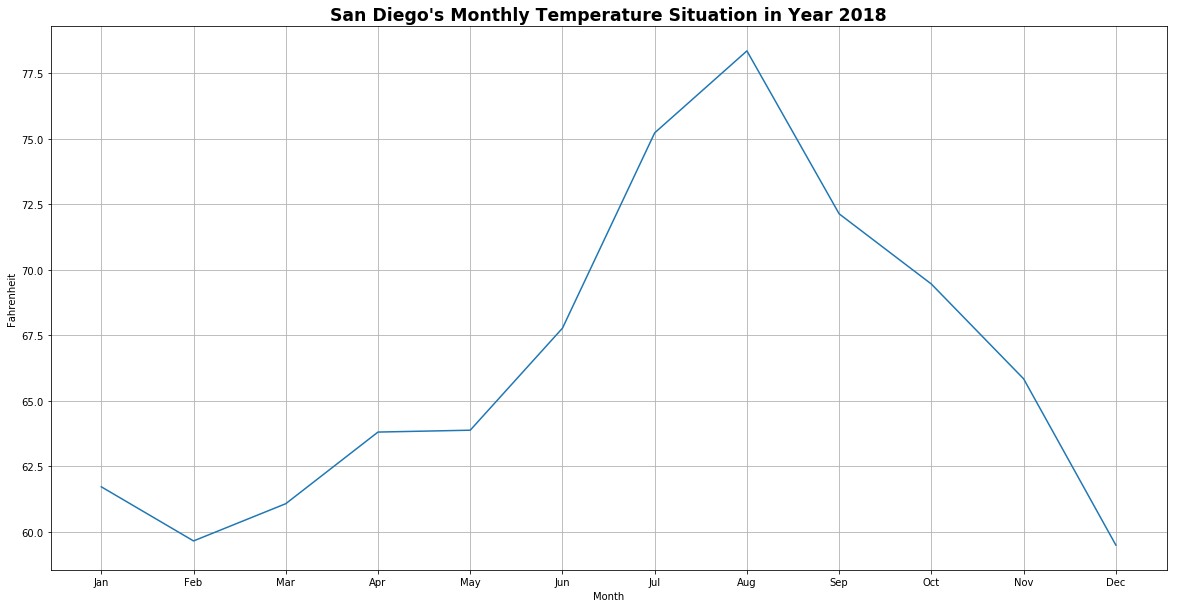

In [68]:
# Plot
plt.figure(figsize=(20,10))
plt.plot(range(12), monthly_avg_temp_list)
title_str = '{}\'s Monthly Temperature Situation in Year {}'.format(code_city_refer[city], year)
plt.xlabel('Month')
plt.xticks(range(12),['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.ylabel('Fahrenheit')
plt.title(title_str,fontsize='xx-large',fontweight='bold')
plt.grid()
plt.show()

##   Temperature of a Specific Month in All Years

In [57]:
# Parameter
city = 'KSAN'
month = 3
fname = 'pics/{}_temp_allyears_plot.jpg'.format(city)
# Code
start_year = 1990
end_year = 2019
if month > 4:
    end_year = 2018
monthly_avg_temp_list = []
for year in range(start_year, end_year + 1):
    month_start, month_end = get_monthly_start_end(year=year, month=month)
    weather_info = get_info(city,month_start, month_end, info_type='temperature', output=False)
    monthly_avg_temp_list.append(weather_info['mean'])
print(monthly_avg_temp_list)

[58.225806451612904, 56.32258064516129, 59.87096774193548, 60.87096774193548, 60.12903225806452, 60.096774193548384, 59.58064516129032, 61.25806451612903, 59.03225806451613, 57.935483870967744, 57.645161290322584, 58.54838709677419, 57.193548387096776, 59.774193548387096, 62.193548387096776, 60.354838709677416, 57.16129032258065, 60.193548387096776, 59.16129032258065, 59.74193548387097, 60.61290322580645, 61.096774193548384, 58.516129032258064, 60.354838709677416, 64.41935483870968, 66.45161290322581, 63.0, 62.935483870967744, 61.064516129032256, 60.87096774193548]


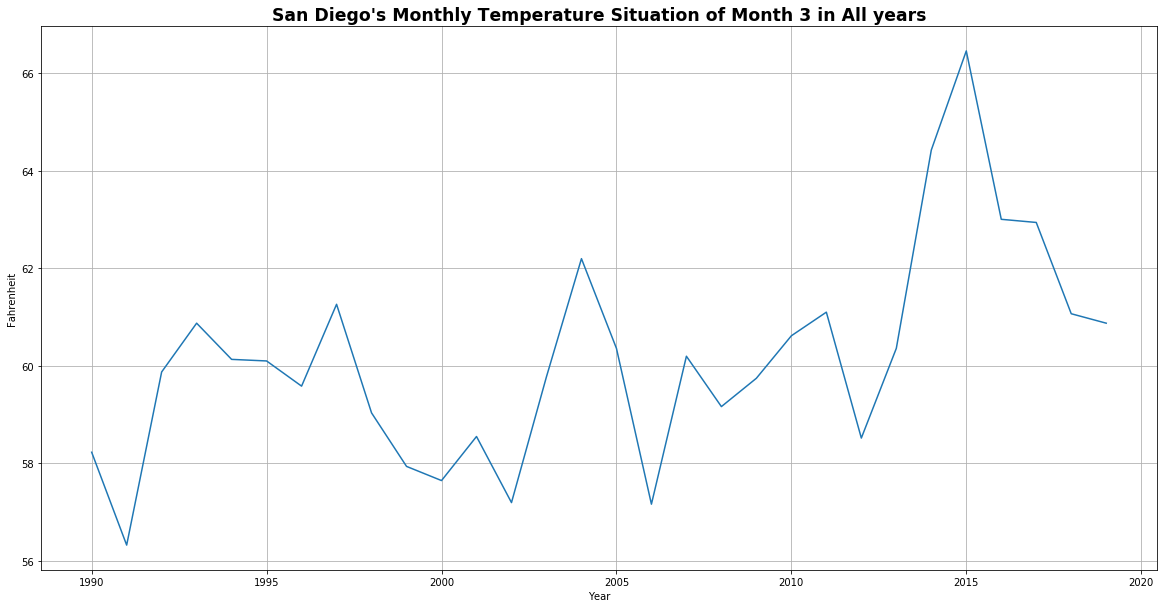

In [58]:
# plot
plt.figure(figsize=(20,10))
plt.plot(range(start_year, end_year + 1), monthly_avg_temp_list)
title_str = '{}\'s Monthly Temperature Situation of Month {} in All years'.format(code_city_refer[city], month)
plt.xlabel('Year')
plt.ylabel('Fahrenheit')
plt.title(title_str,fontsize='xx-large',fontweight='bold')
plt.grid()
plt.show()

## Temperature of Year in All Years

In [65]:
# Parameter
city = 'KSAN'
fname = 'pics/{}_temp_allyears_plot.jpg'.format(city)
# Code
start_year = 1990
end_year = 2019
yearly_avg_temp_list = []
for year in range(start_year, end_year + 1):
    month_start, month_end = get_yearly_start_end(year=year)
    weather_info = get_info(city,month_start, month_end, info_type='temperature', output=False)
    yearly_avg_temp_list.append(weather_info['mean'])
print(monthly_avg_temp_list)

[58.225806451612904, 56.32258064516129, 59.87096774193548, 60.87096774193548, 60.12903225806452, 60.096774193548384, 59.58064516129032, 61.25806451612903, 59.03225806451613, 57.935483870967744, 57.645161290322584, 58.54838709677419, 57.193548387096776, 59.774193548387096, 62.193548387096776, 60.354838709677416, 57.16129032258065, 60.193548387096776, 59.16129032258065, 59.74193548387097, 60.61290322580645, 61.096774193548384, 58.516129032258064, 60.354838709677416, 64.41935483870968, 66.45161290322581, 63.0, 62.935483870967744, 61.064516129032256, 60.87096774193548]


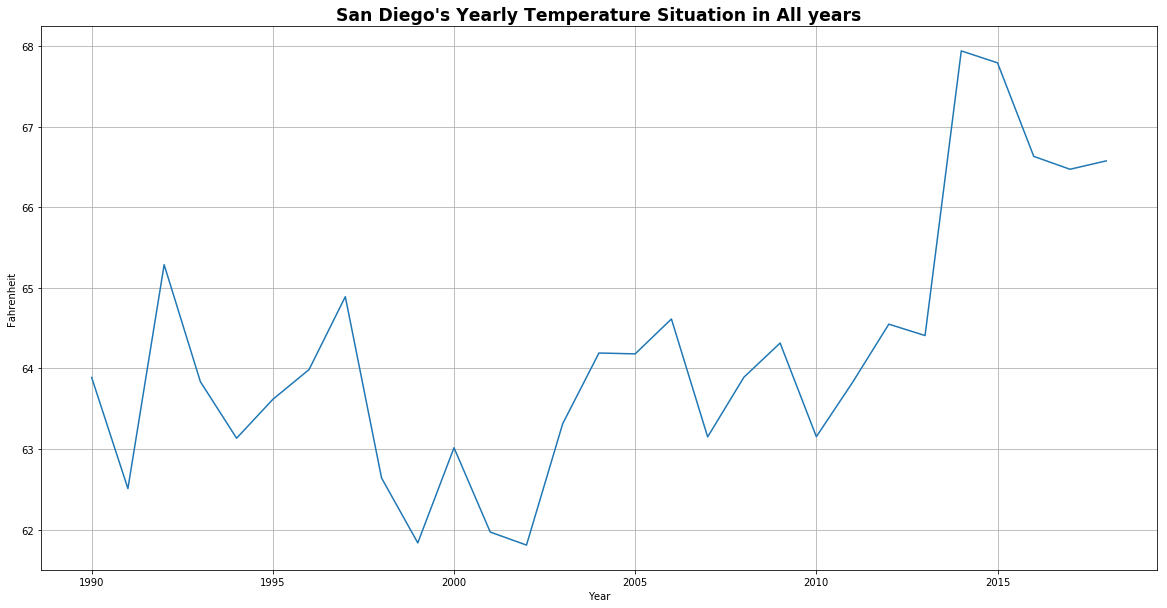

In [66]:
# plot
plt.figure(figsize=(20,10))
plt.plot(range(start_year, end_year), yearly_avg_temp_list[:-1])
title_str = '{}\'s Yearly Temperature Situation in All years'.format(code_city_refer[city])
plt.xlabel('Year')
plt.ylabel('Fahrenheit')
plt.title(title_str,fontsize='xx-large',fontweight='bold')
plt.grid()
plt.show()

# A Single City's Information - Precipitation